# Getting started with Keras

Keras is a minimalist, highly modular deep neural network library written in Python and built on top of Theano and Tensorflow. This allows it to accelerate computations by offloading them to one or more GPUs. It is also easier to use than raw Theano and Tensorflow, as it includes several functionalities:

- Standard APIs for sequential and functional models with feedforward, convolutional, and recurrent layers
- Several optimization algorithms and advanced activation functions
- Monitoring/callback support
- Easily extensible

Simple models, such as feedforward networks, are straightforward to implement. The code below is the entire definition of a simple digit classifier for the MNIST dataset (without the data preprocessing):

In [1]:
from __future__ import print_function
import numpy as np

np.random.seed(42)  # for reproducibility

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Using Theano backend.
Using gpu device 0: Quadro K2000M (CNMeM is disabled, cuDNN 5005)


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 512)           401920      dense_input_1[0][0]              
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 512)           0           dense_1[0][0]                    
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 512)           262656      activation_1[0][0]               
____________________________________________________________________________________________________
activation_2 (Activation)        (None, 512)           0           dense_2[0][0]                    
___________________________________________________________________________________________

The code is short but there's a lot going on here, so let's analyze the code in parts.

- `model = Sequential()`: `Sequential` models are stacks of layers, where the output of the previous layer is the input of the current layer.

- `model.add`: adds a layer to the model. 

- `Dense`: a `Dense` layer simply performs an affine transform $z = Wx + b$.

- `Activation`: applies an elementwise non-linearity $g()$ to the output of the previous layer: $a = g(z)$. You do not have to add it separately: the initializer for most layers in Keras, including `Dense`, has a keyword argument 'activation'.


In [ ]:
from keras.datasets import mnist
from keras.utils import np_utils

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

nb_classes = 10 # Digits from 0 to 9

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)


In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.imshow(X_train[1].reshape(28,28), cmap='gray')

Keras is based on Theano or Tensorflow, which are libraries that allow you to define mathematical expressions symbolically and get an optimized implementation of the expressions and its gradients "for free". However, that means models have to be compiled prior to training/inference, as the symbolic expressions need to be converted to C++/CUDA code and compiled. Your Python code will automatically interact with this compiled code, so you do not need to worry about interfacing.

In [ ]:
from keras.optimizers import SGD, Adam, RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

When compiling a model, you also need to pass at least two other elements:

1. The loss that will be optimized during training
2. An optimizer algorithm, which will be responsible for updating the model after each iteration

You can also optionally pass a number of metrics that will be evaluated at each iteration, but that are not used in the cost function. In this case, we want to know the accuracy of the optimizer.

In [ ]:
batch_size = 128
nb_epoch = 10

history = model.fit(X_train, Y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=1, validation_data=(X_test, Y_test))

We can also plot a high-level graph to visualize the model. Not very exciting for models like this but can be really convenient once you have models whose architecture is instantiated programmatically or multiple input/output models.

Note: you have to install the `pydot-ng` package for this to work. To install it with Conda, call `conda install pydot-ng`.

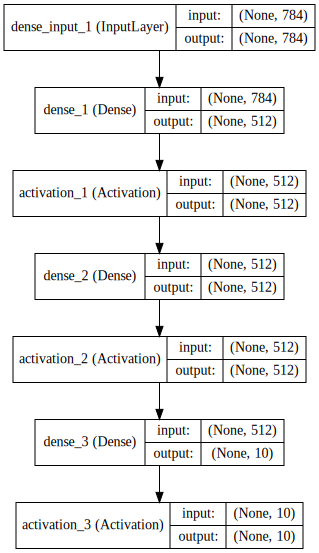

In [2]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))